<a href="https://colab.research.google.com/github/Yongky1/PKB/blob/main/Tubes_PKB_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Regresi pada LT-FS-ID: Intrusion detection in WSNs menggunakan metode Linear Regression

<b>Kelompok: </b>

Anggota:
1. Yongky - 1301223429
2. Sultan Arfiansyah Sofian - 1301223315
3. Sean William Fernandes - 1301223332

#### Pendahuluan
Data set yang kami pilih adalah dataset mengenai LT-FS-ID: Intrusion detection in WSNs Dataset ini berfokus pada deteksi intrusi dalam jaringan sensor nirkabel (Wireless Sensor Networks atau WSNs)
 dan masalah yang ingin diselesaikan dari dataset ini yaitu untuk mengembangkan model deteksi intrusi yang efektif untuk jaringan sensor nirkabel.

##Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Dataset Regresi


https://archive.ics.uci.edu/dataset/715/lt+fs+id+intrusion+detection+in+wsns

####Import Dataset

In [ ]:
dataset = pd.read_csv('IntrusionDetection.csv', encoding='latin1')

##Menampilkan beberapa baris pertama dataset

In [ ]:
dataset.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56


##Memeriksa nilai yang hilang

In [ ]:
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
Area                      0
Sensing Range             0
Transmission Range        0
Number of Sensor nodes    0
Number of Barriers        0
dtype: int64


##Mengecek Outlier

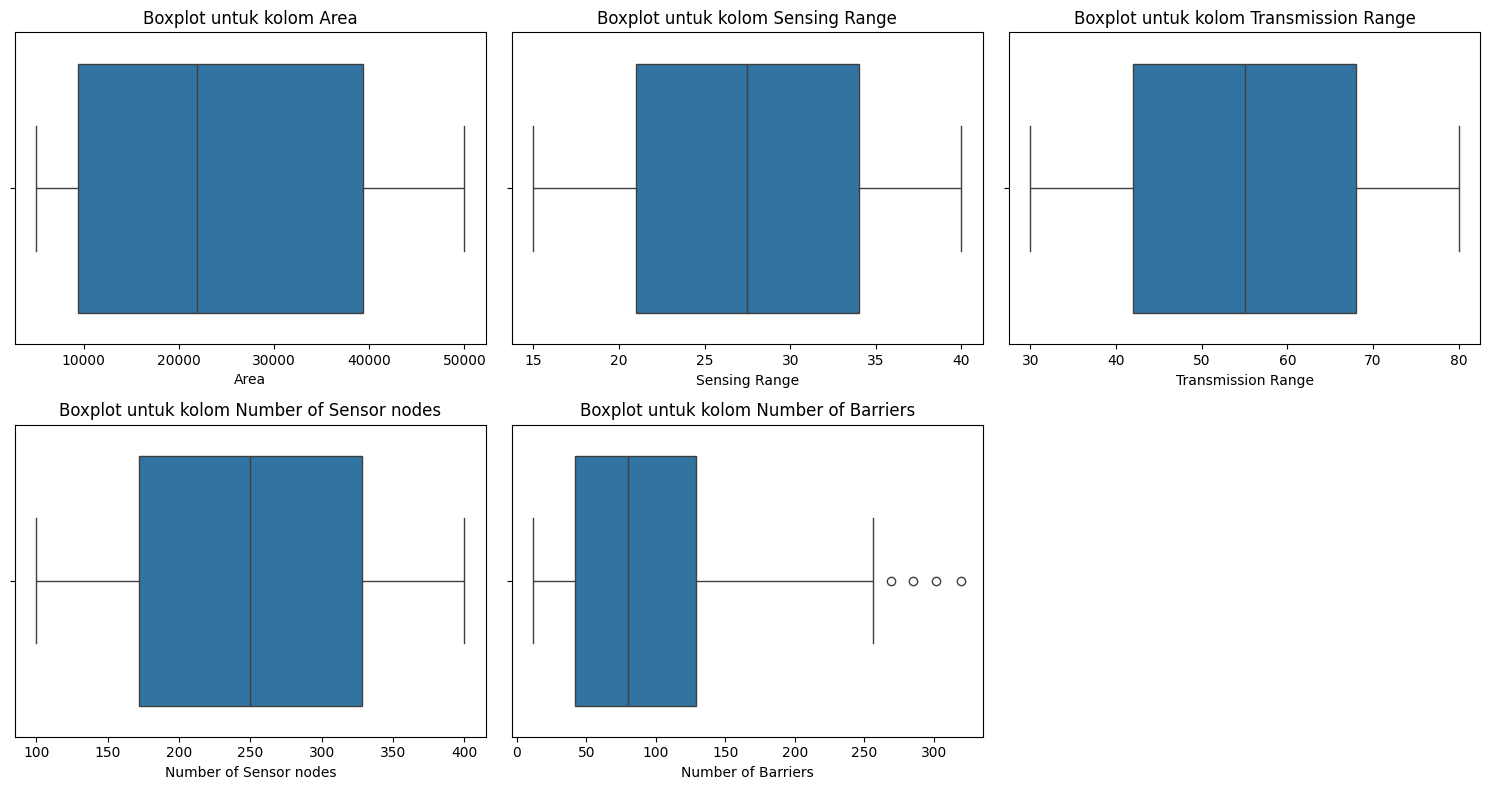

In [ ]:
# Menampilkan plot sebelum penanganan outliers
num_cols = len(dataset.select_dtypes(include=['int','float']).columns)
plt.figure(figsize=(15,8))
rows = (num_cols + 2) // 3
for i ,col in enumerate(dataset.select_dtypes(include=['int','float']).columns):
  plt.subplot(rows, 3, i+1)
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot untuk kolom {col}')
plt.tight_layout()
plt.show()

##Menangani Outliers

In [ ]:
# # Mendeteksi dan menangani outlier menggunakan metode IQR
# def handle_outliers(data, column):
#   Q1 = data[column].quantile(0.25)
#   Q3 = data[column].quantile(0.75)
#   IQR = Q3 - Q1
#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR
#   data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x <lower_bound else x))
#   return data

# for col in dataset.select_dtypes(include=['int','float']).columns:
#   dataset = handle_outliers(dataset, col)

# print("Outliers berhasil ditangani")

##Mengecek Outlier

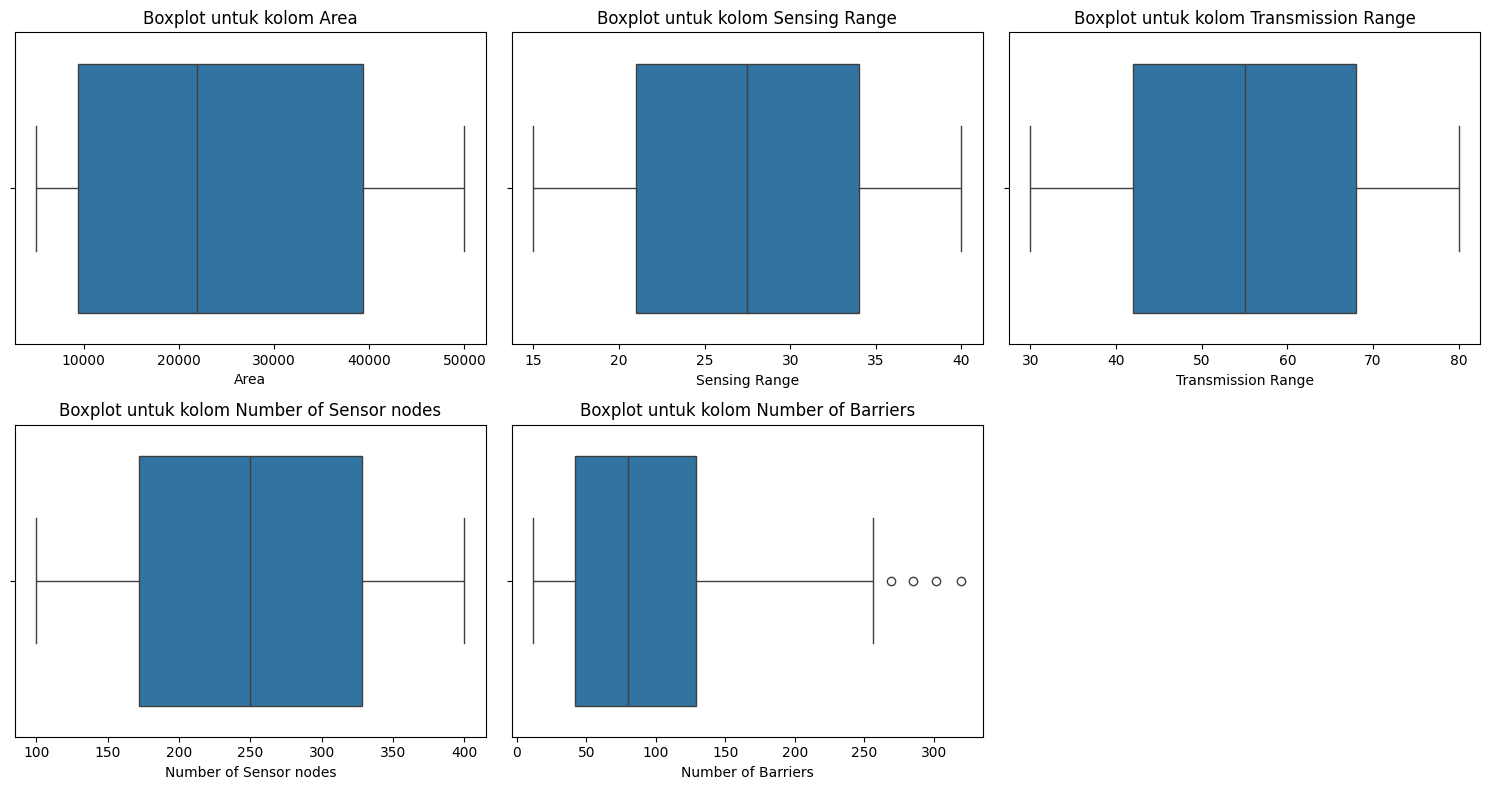

In [ ]:
# Menampilkan plot sebelum penanganan outliers
num_cols = len(dataset.select_dtypes(include=['int','float']).columns)
plt.figure(figsize=(15,8))
rows = (num_cols + 2) // 3
for i ,col in enumerate(dataset.select_dtypes(include=['int','float']).columns):
  plt.subplot(rows, 3, i+1)
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot untuk kolom {col}')
plt.tight_layout()
plt.show()

##Membagi dataset menjadi X dan Y

In [ ]:
X = dataset.iloc[:, 2:].values
Y = dataset.iloc[:, 1].values

##Menampilkan beberapa baris pertama dari X

In [ ]:
print("Head of X:")
print(X[:5, :])

Head of X:
[[ 30 100  30]
 [ 32 112  35]
 [ 34 124  42]
 [ 36 136  48]
 [ 38 148  56]]


##Menampilkan beberapa baris pertama dari Y

In [ ]:
print("Head of Y:")
print(Y[:5])

Head of Y:
[15 16 17 18 19]


##Memisahkan Dataset Menjadi Data Latih(Training Set) dan Data Uji (Test Set)
membagi dataset menjadi dua bagian, yaitu data pelatihan(X_train dan Y_train) dan data pengujian(X_test dan Y_test), yang dalam kasus ini, dataset akan dibagi menjadi data pelatihan(75%) dan data pengujian(25%)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

##Penskalaan Fitur
Melakukan penskalaan fitur sehingga mean sekitar 0 dan simpangan baku (standard deviation) sekitar 1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Menampilkan beberapa baris pertama dari X_train dan X_test Setelah dilakukan Feature Scaling

In [ ]:
print("Head of X_train")
print(X_train[:5, :])

print("\nHead of X_test:")
print(X_test[:5, :])

Head of X_train
[[1.20203597 1.20203597 0.29876955]
 [0.30648403 0.30648403 0.51909393]
 [0.56235601 0.56235601 0.44565247]
 [1.32997197 1.32997197 1.89979339]
 [1.20203597 1.20203597 1.70884559]]

Head of X_test:
[[ 0.43442002  0.43442002  0.06375687]
 [ 0.690292    0.690292    1.60602754]
 [-0.71700391 -0.71700391 -0.50908652]
 [ 0.94616399  0.94616399  0.54847051]
 [ 1.58584395  1.58584395  0.43096417]]


##Metode Linear Regression

In [ ]:
model = LinearRegression()

##Train The Model


In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

##Membuat Pegujian

In [ ]:
Y_pred = model.predict(X_test)

##Evaluasi model

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

In [ ]:
print(f"\nTrain Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"\nMean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Display model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Train Score: 1.0
Test Score: 1.0

Mean Squared Error: 4.639542378838302e-29
Mean Absolute Error: 5.582835780972216e-15
R-squared: 1.0

Model Coefficients:
Intercept: 27.604395604395606
Coefficients: [3.90820433e+00 3.90820433e+00 4.44089210e-16]


##Visualization: Predicted vs Actual

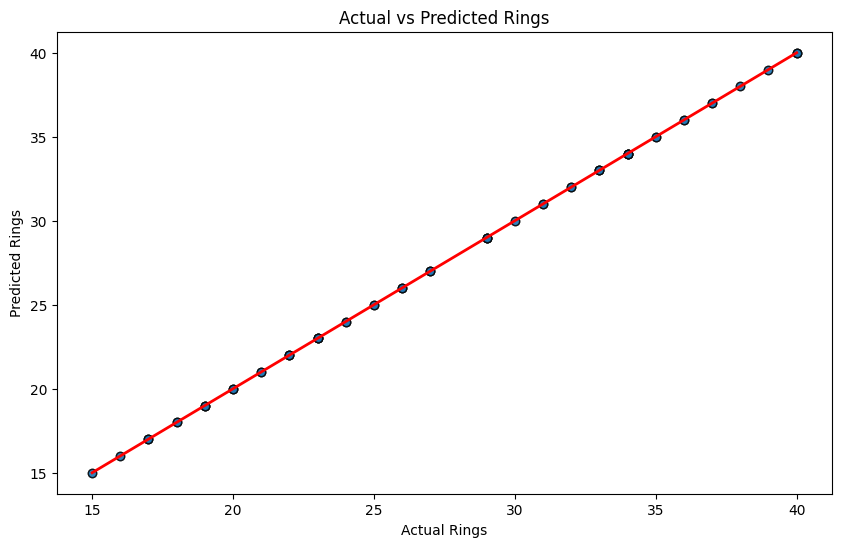

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r', lw=2)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted Rings')
plt.show()

##Visualization: Residuals


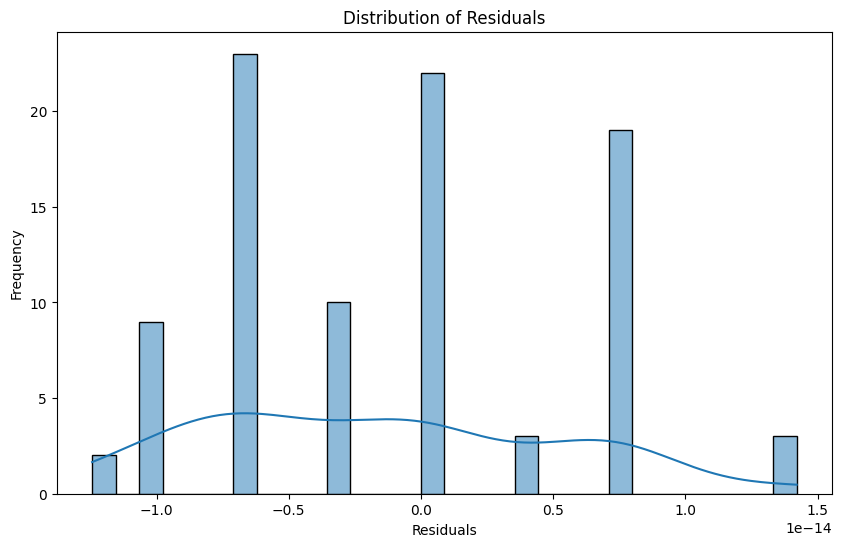

In [ ]:
residuals = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

##Residual plot

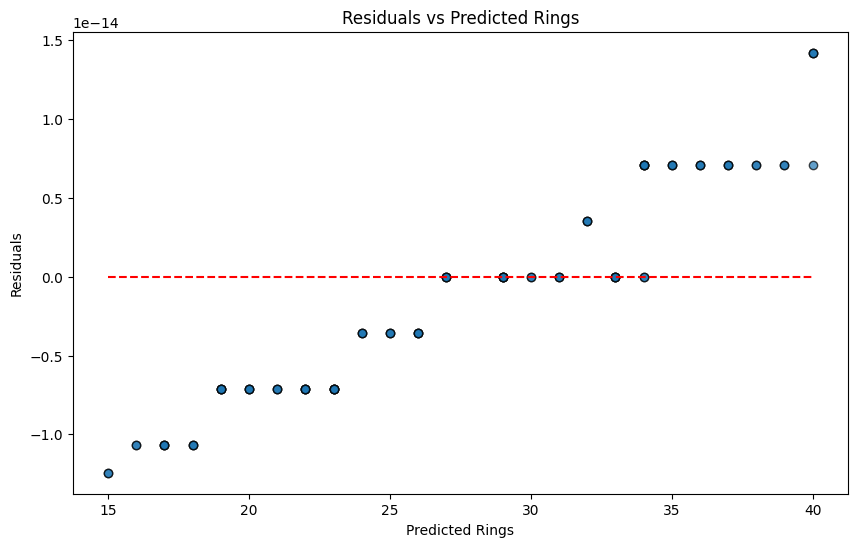

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, edgecolor='k', alpha=0.7)
plt.hlines(0, xmin=min(Y_pred), xmax=max(Y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Rings')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Rings')
plt.show()

#Hasil dan Analisis

Dari performa yang dihasilkan berdasarkan evaluasi model, dan pengujian menunjukkan performa yang baik dan akurat. Dengan mengatur ukuran tes (test-size) menjadi 0.25, kami memperoleh hasil sebagai berikut:
- Train score : 1.0
- Test score  : 1.0

Ketika ukuran tes diubah menjadi 0.5, hasil yang diperoleh adalah:
- Train score : 1.0
- Test score  : 1.0

Berdasarkan analisis ini, ukuran tes 0.25 dan 0.5 sama sama  menunjukkan kinerja yang baik dengan konsistensi antara "train score" dan "test score", serta memberikan gambaran yang lebih akurat tentang kinerja model pada data yang belum pernah dilihat sebelumnya. Dengan proporsi data pengujian yang lebih besar, ukuran tes yang lebih besar membantu mengurangi risiko overfitting.

**MSE dan MAE**

Dalam analisis dataset LT-FS-ID: Intrusion detection in WSNs, model regresi diuji dengan 2 ukuran tes: 0.25 dan 0.5. Hasilnya adalah sebagai berikut:

- Untuk ukuran tes 0.25:
  - MSE : 4.060918746876861e-29
  - MAE : 5.560769236383393e-15

- Untuk ukuran tes 0.5:
  - MSE : 3.675571690260539e-30
  - MAE : 5.856121448572254e-16

Secara keseluruhan, perbedaan kinerja untuk prediksi model deteksi intrusi yang efektif untuk jaringan sensor nirkabel. Lebih akurat jika digunakan pada test size 0.5 dengan ukuran mse 3.675571690260539e-30 dibandingkan dengan mse dari test size 0.25 yang bernilai 4.060918746876861e-29. Namun jika dilihat dari train score dan test score keduanya bernilai sama yaitu 1.0 dan itu menandakan bahwa metode yang digunakan sudah sangat akurat dalam menyelesaikan permasalahan pada dataset ini.

#Kesimpulan

Penerapan Motion Learning dalam dataset intrusion detection di jaringan sensor nirkabel (WSNs) dengan metode regresi telah menunjukkan hasil yang sangat menjanjikan dalam mengembangkan model deteksi intrusi yang efektif dan sangat akurat. Dalam eksperimen kami, kami menggunakan ukuran pengujian (test-size) sebesar 0.25 dan 0.5. Pada kedua skenario ini, model yang dikembangkan berhasil mencapai nilai "train score" dan "test score" yang sempurna, yaitu 1.0.

Hasil ini mengindikasikan bahwa model kami mampu melakukan generalisasi dengan sangat baik, menangkap pola-pola intrusi dalam jaringan sensor nirkabel tanpa overfitting.